# Prepare files for Single Cell Portal upload

Stephen Fleming

20210212

In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

from sc_utils import adata_to_single_cell_portal_files

In [2]:
adata = sc.read_h5ad('/home/jupyter-user/analysis/h5ads/broad_heart_review_annotated_20210121.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 40880 × 30054
    obs: 'barcodes', 'n_genes', 'n_counts', 'percent_mito', 'method', 'sample', 'doublet', 'max_umis', 'study', 'disease', 'class', 'probability', 'class_2', 'probability_2', 'leiden0.5', 'leiden1.5', 'leiden1.0', 'manual_labels_leiden1.0', 'manual_labels_leiden1.5', 'display_sample'
    var: 'featureid-0', 'n_cells-0', 'percent_cells-0', 'robust-0', 'highly_variable_features-0', 'mean-0', 'var-0', 'hvf_loess-0', 'hvf_rank-0', 'bins-0', 'featureid-1', 'n_cells-1', 'percent_cells-1', 'robust-1', 'highly_variable_features-1', 'mean-1', 'var-1', 'hvf_loess-1', 'hvf_rank-1', 'bins-1', 'featureid-10', 'n_cells-10', 'percent_cells-10', 'robust-10', 'highly_variable_features-10', 'mean-10', 'var-10', 'hvf_loess-10', 'hvf_rank-10', 'bins-10', 'featureid-11', 'n_cells-11', 'percent_cells-11', 'robust-11', 'highly_variable_features-11', 'mean-11', 'var-11', 'hvf_loess-11', 'hvf_rank-11', 'bins-11', 'featureid-12', 'n_cells-12', 'percent_cells-12

In [4]:
adata.var.head()

,featureid-0,n_cells-0,percent_cells-0,robust-0,highly_variable_features-0,mean-0,var-0,hvf_loess-0,hvf_rank-0,bins-0,...,var-9,hvf_loess-9,hvf_rank-9,bins-9,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
featurekey,,,,,,,,,,,,,,,,,,,,,
A1BG,ENSG00000121410,2.0,0.938967,True,False,0.045985,0.225894,0.225702,7995.0,"(0.0448, 0.0463]",...,0.048864,0.045211,5263.0,"(0.0101, 0.0116]",False,0.025934,1.791961,0.099995,4,False
A1BG-AS1,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,...,0.058781,0.061155,28782.0,"(0.0134, 0.0155]",True,0.034215,1.972535,0.420277,10,False
A1CF,nan,NaN,NaN,nan,nan,NaN,NaN,NaN,NaN,NaN,...,0.016485,0.016587,19039.0,"(0.00359, 0.00438]",False,0.038372,1.538713,0.065685,4,False
A2M,ENSG00000175899,51.0,23.943662,True,False,1.215425,4.802882,4.836876,21188.0,"(0.95, 1.302]",...,2.996021,2.980323,8651.0,"(0.742, 0.964]",False,1.219765,2.911863,0.398145,7,False
A2M-AS1,ENSG00000245105,3.0,1.408451,True,False,0.072661,0.372287,0.371623,7368.0,"(0.0707, 0.0773]",...,0.047922,0.048250,20098.0,"(0.0101, 0.0116]",True,0.040132,1.950507,0.412884,8,False


In [5]:
# get rid of a bunch of the junk in adata.var

adata.var = adata.var[[
'featureid-0', 
'highly_variable',
'means',
'dispersions',
'dispersions_norm',
'highly_variable_nbatches',
'highly_variable_intersection']]

adata.var.rename(columns={'featureid-0': 'gene_id'}, inplace=True)

In [6]:
adata.var.head()

,gene_id,highly_variable,means,dispersions,dispersions_norm,highly_variable_nbatches,highly_variable_intersection
featurekey,,,,,,,
A1BG,ENSG00000121410,False,0.025934,1.791961,0.099995,4,False
A1BG-AS1,nan,True,0.034215,1.972535,0.420277,10,False
A1CF,nan,False,0.038372,1.538713,0.065685,4,False
A2M,ENSG00000175899,False,1.219765,2.911863,0.398145,7,False
A2M-AS1,ENSG00000245105,True,0.040132,1.950507,0.412884,8,False


In [7]:
adata

AnnData object with n_obs × n_vars = 40880 × 30054
    obs: 'barcodes', 'n_genes', 'n_counts', 'percent_mito', 'method', 'sample', 'doublet', 'max_umis', 'study', 'disease', 'class', 'probability', 'class_2', 'probability_2', 'leiden0.5', 'leiden1.5', 'leiden1.0', 'manual_labels_leiden1.0', 'manual_labels_leiden1.5', 'display_sample'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'manual_labels_leiden1.5_colors', 'neighbors', 'pca', 'rank_genes_groups_leiden0.5', 'rank_genes_groups_leiden1.0', 'rank_genes_groups_leiden1.5', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs'
    layers: 'counts', 'winsorized'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs.head()

,barcodes,n_genes,n_counts,percent_mito,method,sample,doublet,max_umis,study,disease,class,probability,class_2,probability_2,leiden0.5,leiden1.5,leiden1.0,manual_labels_leiden1.0,manual_labels_leiden1.5,display_sample
1-0,02-P166169-S117-R01-CTCCACAGTACAGTCT,1346,2576.0,0.582298,nuclei,02-P166169-S117-R01,False,50.0,broad,COVID-19,fibroblast,0.789212,pericyte,0.052175,0,0,0,0: Fibroblast 1,0: Fib 1,D3_heart2
2-0,02-P166169-S117-R01-TCTTGCGTCTACTTCA,1390,2105.0,0.000000,nuclei,02-P166169-S117-R01,False,25.0,broad,COVID-19,fibroblast,0.747905,smc,0.087205,0,0,0,0: Fibroblast 1,0: Fib 1,D3_heart2
3-0,02-P166169-S117-R01-TCATGGAGTCGAAGCA,1090,1859.0,2.528241,nuclei,02-P166169-S117-R01,False,35.0,broad,COVID-19,vascular endothelial,0.733902,lymphatic endothelial,0.014820,2,1,1,1: Endothelial 1,1: EC 1,D3_heart2
4-0,02-P166169-S117-R01-TGGTACACACTTCTCG,1014,1841.0,0.597501,nuclei,02-P166169-S117-R01,False,110.0,broad,COVID-19,fibroblast,0.654755,adipocyte,0.089773,0,0,0,0: Fibroblast 1,0: Fib 1,D3_heart2
5-0,02-P166169-S117-R01-GTTCGCTCATGGCTAT,1095,1770.0,4.293785,nuclei,02-P166169-S117-R01,False,27.0,broad,COVID-19,pericyte,0.851344,smc,0.066283,3,5,4,4: Pericyte,5: Pericyte,D3_heart2


In [9]:
adata.obs.columns

Index(['barcodes', 'n_genes', 'n_counts', 'percent_mito', 'method', 'sample',
       'doublet', 'max_umis', 'study', 'disease', 'class', 'probability',
       'class_2', 'probability_2', 'leiden0.5', 'leiden1.5', 'leiden1.0',
       'manual_labels_leiden1.0', 'manual_labels_leiden1.5', 'display_sample'],
      dtype='object')

In [10]:
adata.obs['study'].value_counts()

broad    40880
Name: study, dtype: int64

In [11]:
# correct study

adata.obs['study'] = adata.obs['sample'].apply(lambda s: 'Broad' if s.startswith('0') else 'Izar')

In [12]:
adata.obs['study'].value_counts()

Broad    30017
Izar     10863
Name: study, dtype: int64

In [13]:
# get rid of Broad IDs

adata.obs = adata.obs[[
    'barcodes', 'n_genes', 'n_counts', 'percent_mito', 'method', 
    'doublet', 'max_umis', 'study', 'disease', 'class', 'probability',
    'class_2', 'probability_2', 'leiden1.5', 
    'manual_labels_leiden1.5', 'display_sample'
]]

# rename display_sample as sample
adata.obs.rename(columns={'display_sample': 'sample'}, inplace=True)

# donor information
adata.obs['donor'] = adata.obs['sample'].apply(lambda s: s.split('_')[0]).astype('category')

In [14]:
pd.crosstab(adata.obs['donor'], adata.obs['study'])

study,Broad,Izar
donor,,
D1,10257,0
D10,1431,0
D11,2384,0
D14,0,677
D15,0,2957
D16,0,1620
D17,0,1391
D2,5832,0
D27,0,2006


In [15]:
adata.obs.head()

,barcodes,n_genes,n_counts,percent_mito,method,doublet,max_umis,study,disease,class,probability,class_2,probability_2,leiden1.5,manual_labels_leiden1.5,sample,donor
1-0,02-P166169-S117-R01-CTCCACAGTACAGTCT,1346,2576.0,0.582298,nuclei,False,50.0,Broad,COVID-19,fibroblast,0.789212,pericyte,0.052175,0,0: Fib 1,D3_heart2,D3
2-0,02-P166169-S117-R01-TCTTGCGTCTACTTCA,1390,2105.0,0.000000,nuclei,False,25.0,Broad,COVID-19,fibroblast,0.747905,smc,0.087205,0,0: Fib 1,D3_heart2,D3
3-0,02-P166169-S117-R01-TCATGGAGTCGAAGCA,1090,1859.0,2.528241,nuclei,False,35.0,Broad,COVID-19,vascular endothelial,0.733902,lymphatic endothelial,0.014820,1,1: EC 1,D3_heart2,D3
4-0,02-P166169-S117-R01-TGGTACACACTTCTCG,1014,1841.0,0.597501,nuclei,False,110.0,Broad,COVID-19,fibroblast,0.654755,adipocyte,0.089773,0,0: Fib 1,D3_heart2,D3
5-0,02-P166169-S117-R01-GTTCGCTCATGGCTAT,1095,1770.0,4.293785,nuclei,False,27.0,Broad,COVID-19,pericyte,0.851344,smc,0.066283,5,5: Pericyte,D3_heart2,D3


In [16]:
adata

AnnData object with n_obs × n_vars = 40880 × 30054
    obs: 'barcodes', 'n_genes', 'n_counts', 'percent_mito', 'method', 'doublet', 'max_umis', 'study', 'disease', 'class', 'probability', 'class_2', 'probability_2', 'leiden1.5', 'manual_labels_leiden1.5', 'sample', 'donor'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'manual_labels_leiden1.5_colors', 'neighbors', 'pca', 'rank_genes_groups_leiden0.5', 'rank_genes_groups_leiden1.0', 'rank_genes_groups_leiden1.5', 'umap'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs'
    layers: 'counts', 'winsorized'
    obsp: 'connectivities', 'distances'

... storing 'study' as categorical


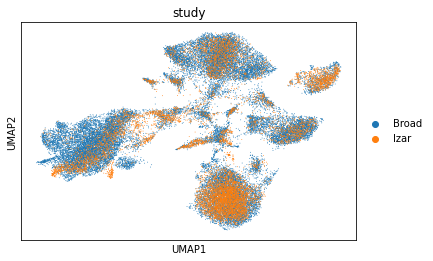

In [17]:
sc.pl.embedding(adata, basis='umap', color='study')

Actually though, we have made the decision not to include "study" metadata, based on it not being in the lung SCP release.

In [18]:
adata.obs['predictions'] = adata.obs['class']

In [19]:
adata.obs.columns

Index(['barcodes', 'n_genes', 'n_counts', 'percent_mito', 'method', 'doublet',
       'max_umis', 'study', 'disease', 'class', 'probability', 'class_2',
       'probability_2', 'leiden1.5', 'manual_labels_leiden1.5', 'sample',
       'donor', 'predictions'],
      dtype='object')

In [20]:
# remove extraneous auto-annotation stuff

adata.obs = adata.obs[['barcodes', 'sample', 'donor', 'method', 'disease', 
                       'predictions', 'leiden1.5', 'manual_labels_leiden1.5', 
                       'n_genes', 'n_counts', 'percent_mito', 'doublet', 'max_umis']]

In [21]:
adata.obs = adata.obs.set_index('barcodes')

In [22]:
adata.obs.head()

,sample,donor,method,disease,predictions,leiden1.5,manual_labels_leiden1.5,n_genes,n_counts,percent_mito,doublet,max_umis
barcodes,,,,,,,,,,,,
02-P166169-S117-R01-CTCCACAGTACAGTCT,D3_heart2,D3,nuclei,COVID-19,fibroblast,0,0: Fib 1,1346,2576.0,0.582298,False,50.0
02-P166169-S117-R01-TCTTGCGTCTACTTCA,D3_heart2,D3,nuclei,COVID-19,fibroblast,0,0: Fib 1,1390,2105.0,0.000000,False,25.0
02-P166169-S117-R01-TCATGGAGTCGAAGCA,D3_heart2,D3,nuclei,COVID-19,vascular endothelial,1,1: EC 1,1090,1859.0,2.528241,False,35.0
02-P166169-S117-R01-TGGTACACACTTCTCG,D3_heart2,D3,nuclei,COVID-19,fibroblast,0,0: Fib 1,1014,1841.0,0.597501,False,110.0
02-P166169-S117-R01-GTTCGCTCATGGCTAT,D3_heart2,D3,nuclei,COVID-19,pericyte,5,5: Pericyte,1095,1770.0,4.293785,False,27.0


In [23]:
adata.obs['doublet'] = adata.obs['doublet'].astype('category')

In [24]:
[(k, adata.obs[k].dtype) for k in adata.obs.columns]

[('sample',
  CategoricalDtype(categories=['D32_heart', 'D31_heart', 'D28_heart', 'D27_heart',
                    'D17_heart', 'D16_heart', 'D15_heart', 'D14_heart',
                    'D11_heart', 'D10_heart', 'D8_heart', 'D7_heart', 'D6_heart',
                    'D5_heart', 'D4_heart', 'D3_heart2', 'D3_heart1', 'D2_heart',
                    'D1_heart'],
                   ordered=False)),
 ('donor',
  CategoricalDtype(categories=['D1', 'D10', 'D11', 'D14', 'D15', 'D16', 'D17', 'D2', 'D27',
                    'D28', 'D3', 'D31', 'D32', 'D4', 'D5', 'D6', 'D7', 'D8'],
                   ordered=False)),
 ('method', CategoricalDtype(categories=['nuclei'], ordered=False)),
 ('disease', CategoricalDtype(categories=['COVID-19'], ordered=False)),
 ('predictions',
  CategoricalDtype(categories=['CD16+ monocyte', 'CD4+ T cell', 'CD8+ T cell', 'T reg',
                    'adipocyte', 'b', 'cardiomyocyte', 'erythroid', 'fibroblast',
                    'lymphatic endothelial', 'macrophag

## Prep files

In [25]:
adata

AnnData object with n_obs × n_vars = 40880 × 30054
    obs: 'sample', 'donor', 'method', 'disease', 'predictions', 'leiden1.5', 'manual_labels_leiden1.5', 'n_genes', 'n_counts', 'percent_mito', 'doublet', 'max_umis'
    var: 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'hvg', 'leiden', 'manual_labels_leiden1.5_colors', 'neighbors', 'pca', 'rank_genes_groups_leiden0.5', 'rank_genes_groups_leiden1.0', 'rank_genes_groups_leiden1.5', 'umap', 'study_colors'
    obsm: 'X_harmony', 'X_pca', 'X_umap', 'sig_background'
    varm: 'PCs'
    layers: 'counts', 'winsorized'
    obsp: 'connectivities', 'distances'

In [26]:
!mkdir -p /home/jupyter-user/analysis/scp

In [27]:
adata.X = adata.layers['counts'].copy()

In [43]:
import anndata
from typing import List, Callable
import os
from scipy.io import mmwrite
import gzip
import shutil
import inspect
import string
import gc


def adata_to_single_cell_portal_files(
        adata: anndata.AnnData,
        cluster_keys: List[str],
        umap_key: str,
        save_directory: str = './',
        filename_prefix: str = '',
        expression_normalization: Callable[[np.float32], np.float32] = lambda x: np.log2(x + 1),
        use_gzip: bool = True) -> List[str]:
    """Prepare files that can be uploaded to the Single Cell Portal.
    Args:
        adata: The scanpy anndata object, annotated.
        cluster_keys: adata.obs keys for the clusterings to be uploaded as cluster files.
        umap_key: adata.obsm key specifying the UMAP (or tSNE) coordinates (e.g. 'X_scvi_umap')
        expression_normalization: Lambda function used to normalize count data.
        filename_prefix: Prefix to put on every output file.
        save_directory: Where to write output files.
        use_gzip: True to use gzip compression for matrix, barcodes, and genes.
    Returns:
        filenames: List of saved files.
    """

    assert os.access(save_directory, os.W_OK), 'Cannot write to directory ' + save_directory
    for k in cluster_keys:
        assert k in adata.obs.keys(), f'{k} is not a valid clustering in adata.obs.keys()'
    assert umap_key in adata.obsm.keys(), umap_key + ' is not a valid umap key in adata.obsm.keys()'

    print('adata.X data should be non-normalized count data (can be CellBender corrected).')
#     pieces = inspect.getsourcelines(expression_normalization)[0][0].split(',')
#     lam_str = ''
#     for piece in pieces:
#         if 'expression_normalization' in piece:
#             lam_str = piece
#     print('Using normalization:', lam_str.split('=')[1].rstrip())

    # normalize data
    sparse_mat = adata.X.copy()
    sparse_mat.data = expression_normalization(sparse_mat.data)

    # write matrix to sparse matrix market format
    matrix_file = os.path.join(save_directory, filename_prefix + '_matrix.mtx')
    mmwrite(matrix_file, sparse_mat.transpose())

    # sort matrix market format file by gene

    # this is taken from the Single Cell Portal at
    # https://raw.githubusercontent.com/broadinstitute/single_cell_portal/master/scripts/SortSparseMatrix.py
    headers = []
    with open(matrix_file) as matrix:
        line = next(matrix)
        while line.startswith("%"):
            headers = headers + [line]
            line = next(matrix)
        headers = headers + [line]
        df = pd.read_table(matrix, sep='\s+', names=['genes', 'barcodes', 'expr'])

    # sort sparse matrix
    print('Sorting sparse matrix')
    df = df.sort_values(by=['genes', 'barcodes'])

    # save sparse matrix
    with open(matrix_file, 'w+') as output:
        output.write(''.join(headers))
    df.to_csv(matrix_file, sep=' ', index=False, header=0, mode='a')

    # use gzip compression
    if use_gzip:
        with open(matrix_file, 'rb') as f_in:
            with gzip.open(matrix_file + '.gz', 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
        os.remove(matrix_file)  # clean up un-compressed file
        matrix_file = matrix_file + '.gz'
    print('Saved sparse matrix to:', matrix_file)

    # save barcodes file
    if use_gzip:
        barcodes_file = os.path.join(save_directory, filename_prefix + '_barcodes.tsv.gz')
    else:
        barcodes_file = os.path.join(save_directory, filename_prefix + '_barcodes.tsv')
    pd.Series(adata.obs.index).to_csv(barcodes_file, sep='\t', index=False)
    print('Saving barcodes to:', barcodes_file)

    # save genes file
    if use_gzip:
        genes_file = os.path.join(save_directory, filename_prefix + '_genes.tsv.gz')
    else:
        genes_file = os.path.join(save_directory, filename_prefix + '_genes.tsv')
    pd.Series(adata.var.index).to_csv(genes_file, sep='\t', index=False)
    print('Saving genes to:', genes_file)

    # metadata file
    metadata_file = os.path.join(save_directory, filename_prefix + '_metadata.txt')
    header_line_1 = '\t'.join(['NAME'] + adata.obs.columns.tolist()) + '\n'

    def redefine_types(t):
        if str(t) == 'category':
            return 'group'
        elif str(t).startswith('int') or str(t).startswith('float'):
            return 'numeric'
        else:
            raise ValueError(f'unknown dtype {t}')

    header_line_2 = '\t'.join(['TYPE'] + adata.obs.dtypes.apply(redefine_types).values.tolist()) + '\n'

    with open(metadata_file, 'w+') as file:
        file.write(header_line_1)
        file.write(header_line_2)
    adata.obs.to_csv(metadata_file, sep='\t', header=0, mode='a')
    print('Saving cell metadata to:', metadata_file)

    # cluster file(s): cluster names and visualization coordinates
    cluster_files = []
    for k in cluster_keys:
        cluster_df = pd.DataFrame(data={'X': adata.obsm[umap_key][:, 0],
                                        'Y': adata.obsm[umap_key][:, 1],
                                        'Category': adata.obs[k].values},
                                  index=adata.obs[k].index)
        cluster_files.append(os.path.join(save_directory, filename_prefix + '_cluster_' + k + '.txt'))
        header_line_1 = '\t'.join(['NAME', 'X', 'Y', 'Category']) + '\n'
        header_line_2 = '\t'.join(['TYPE', 'numeric', 'numeric', 'group']) + '\n'

        # save file
        with open(cluster_files[-1], 'w+') as file:
            file.write(header_line_1)
            file.write(header_line_2)
        cluster_df.to_csv(cluster_files[-1], sep='\t', header=0, mode='a')
        print(f'Saving cluster {k} to:', cluster_files[-1])

    print('Done.')
    return [matrix_file, barcodes_file, genes_file, metadata_file] + cluster_files

In [44]:
%%time

files = adata_to_single_cell_portal_files(
    adata,
    cluster_keys=['predictions', 'leiden1.5', 'manual_labels_leiden1.5'],
    umap_key='X_umap',
    save_directory='/home/jupyter-user/analysis/scp',
    filename_prefix='covid_heart_LV_',
    expression_normalization=lambda x: np.log2(x + 1),
    use_gzip=True,
)

adata.X data should be non-normalized count data (can be CellBender corrected).
Sorting sparse matrix
Saved sparse matrix to: /home/jupyter-user/analysis/scp/covid_heart_LV__matrix.mtx.gz
Saving barcodes to: /home/jupyter-user/analysis/scp/covid_heart_LV__barcodes.tsv.gz
Saving genes to: /home/jupyter-user/analysis/scp/covid_heart_LV__genes.tsv.gz
Saving cell metadata to: /home/jupyter-user/analysis/scp/covid_heart_LV__metadata.txt
Saving cluster predictions to: /home/jupyter-user/analysis/scp/covid_heart_LV__cluster_predictions.txt
Saving cluster leiden1.5 to: /home/jupyter-user/analysis/scp/covid_heart_LV__cluster_leiden1.5.txt
Saving cluster manual_labels_leiden1.5 to: /home/jupyter-user/analysis/scp/covid_heart_LV__cluster_manual_labels_leiden1.5.txt
Done.
CPU times: user 5min 50s, sys: 8.59 s, total: 5min 59s
Wall time: 6min 4s


In [48]:
adata.write('/home/jupyter-user/analysis/scp/covid_heart_LV.h5ad')

In [49]:
!ls -lh /home/jupyter-user/analysis/scp/

total 1.6G
-rw-rw-r-- 1 jupyter-user users 237K Feb 12 20:35 covid_heart_LV__barcodes.tsv.gz
-rw-rw-r-- 1 jupyter-user users 2.4M Feb 12 20:35 covid_heart_LV__cluster_leiden1.5.txt
-rw-rw-r-- 1 jupyter-user users 2.7M Feb 12 20:35 covid_heart_LV__cluster_manual_labels_leiden1.5.txt
-rw-rw-r-- 1 jupyter-user users 2.8M Feb 12 20:35 covid_heart_LV__cluster_predictions.txt
-rw-rw-r-- 1 jupyter-user users  75K Feb 12 20:35 covid_heart_LV__genes.tsv.gz
-rw-rw-r-- 1 jupyter-user users 1.4G Feb 12 20:39 covid_heart_LV.h5ad
-rw-rw-r-- 1 jupyter-user users 124M Feb 12 20:35 covid_heart_LV__matrix.mtx.gz
-rw-rw-r-- 1 jupyter-user users 4.9M Feb 12 20:35 covid_heart_LV__metadata.txt
